In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

!pip install yfinance
import yfinance as yf

#from google.colab import files
#uploaded = files.upload()

  Stored in directory: C:\Users\Robby\AppData\Local\pip\Cache\wheels\f9\e3\5b\ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Stored in directory: C:\Users\Robby\AppData\Local\pip\Cache\wheels\37\fa\73\d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking


In [ ]:
tickerSymbol = 'T'
tickerData = yf.Ticker(tickerSymbol)

In [ ]:
from datetime import datetime, timedelta

today = datetime.today().strftime('%Y-%m-%d')
print(str(today))

start = datetime.today() - timedelta(days=180)
start = datetime.strftime(start, '%Y-%m-%d')
print(str(start))

2020-06-30
2020-01-02


In [ ]:
tickerDf = tickerData.history(period='1d', start=str(start), end=str(today))
tickerDf
#tickerData.recommendations

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,37.97,38.03,37.54,37.68,32602300,0.0,0
2020-01-03,37.41,38.01,37.40,37.88,27414400,0.0,0
2020-01-06,37.81,37.97,37.65,37.92,38693200,0.0,0
2020-01-07,37.90,38.11,37.80,38.06,28200500,0.0,0
2020-01-08,38.14,38.35,38.10,38.18,40518000,0.0,0
...,...,...,...,...,...,...,...
2020-06-23,30.30,30.68,30.20,30.25,38913000,0.0,0
2020-06-24,30.03,30.04,29.16,29.42,65596000,0.0,0
2020-06-25,29.49,29.81,29.21,29.72,36571300,0.0,0


Text(0, 0.5, 'Price USD ($)')

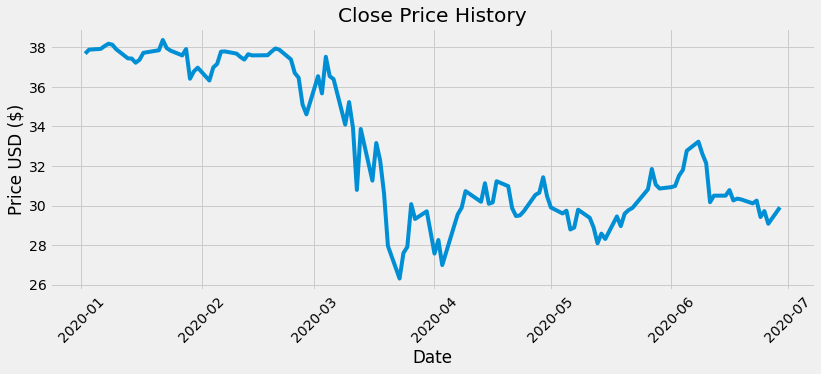

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(tickerDf['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')


In [ ]:
#MACD
#Calc Short Term EMA
ShortEMA = tickerDf.Close.ewm(span=12, adjust=False).mean()
#Calc Long Term EMA
LongEMA = tickerDf.Close.ewm(span=26, adjust=False).mean()

#calc MACD line
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

Text(0.5, 0, 'Date')

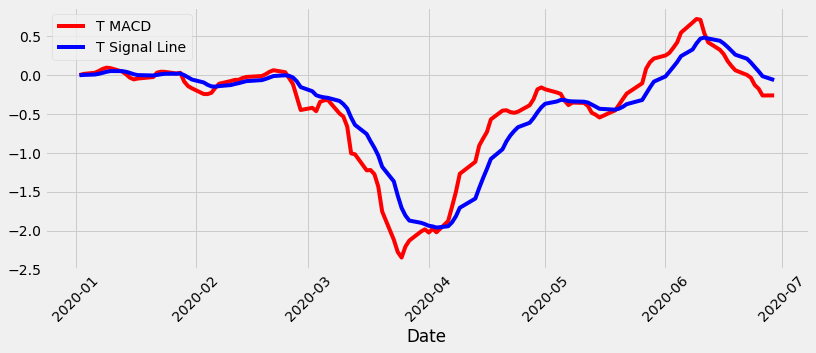

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(tickerDf.index, MACD, label = tickerSymbol+ " MACD", color = "red")
plt.plot(tickerDf.index, signal, label = tickerSymbol+ " Signal Line", color = "blue")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')

In [ ]:
#Transform DF
tickerDf['MACD'] = MACD
tickerDf['Signal Line'] = signal
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line
Date,,,,,,,,,
2020-01-02,37.97,38.03,37.54,37.68,32602300,0.0,0,0.000000,0.000000
2020-01-03,37.41,38.01,37.40,37.88,27414400,0.0,0,0.015954,0.003191
2020-01-06,37.81,37.97,37.65,37.92,38693200,0.0,0,0.031463,0.008845
2020-01-07,37.90,38.11,37.80,38.06,28200500,0.0,0,0.054424,0.017961
2020-01-08,38.14,38.35,38.10,38.18,40518000,0.0,0,0.081365,0.030642
...,...,...,...,...,...,...,...,...,...
2020-06-23,30.30,30.68,30.20,30.25,38913000,0.0,0,-0.032531,0.163096
2020-06-24,30.03,30.04,29.16,29.42,65596000,0.0,0,-0.126344,0.105208
2020-06-25,29.49,29.81,29.21,29.72,36571300,0.0,0,-0.174474,0.049272


In [ ]:
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)




In [ ]:
a = buy_sell(tickerDf)
tickerDf['Buy_Signal_Price'] = a[0]
tickerDf['Sell_Signal_Price'] = a[1]


Text(0, 0.5, 'Close Price')

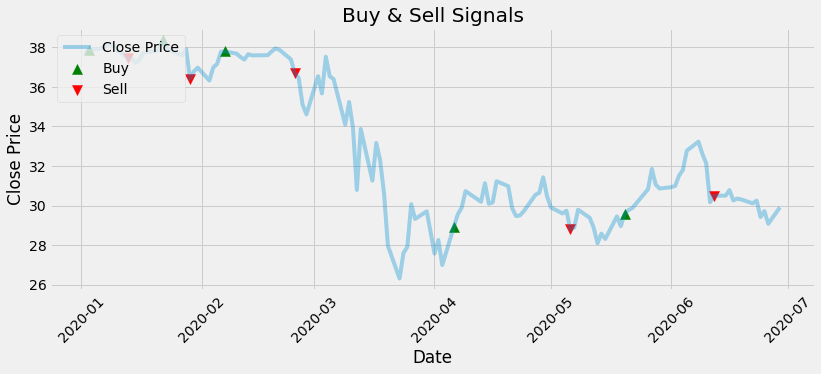

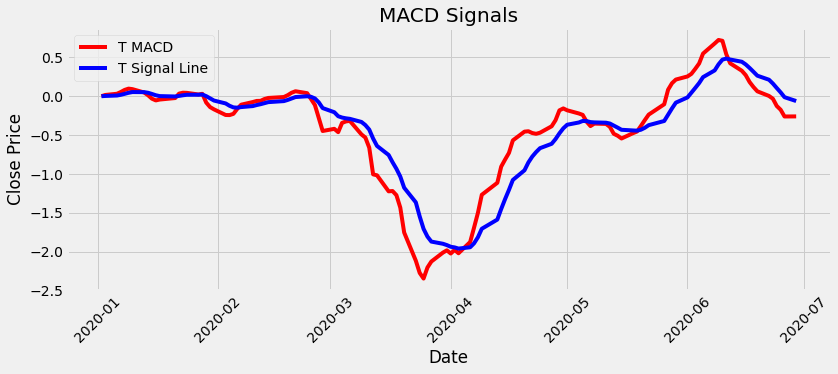

In [ ]:
plt.figure(figsize=(12.2, 4.5))

plt.scatter(tickerDf.index, tickerDf['Buy_Signal_Price'], color='green',label='Buy', marker='^',s=100, alpha=1)
plt.scatter(tickerDf.index, tickerDf['Sell_Signal_Price'], color='red',label='Sell', marker='v',s=100, alpha=1)
plt.plot(tickerDf['Close'],label='Close Price',alpha=0.35)
plt.title('Buy & Sell Signals')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.figure(figsize=(12.2, 4.5))
plt.plot(tickerDf.index, MACD, label = tickerSymbol+ " MACD", color = "red")
plt.plot(tickerDf.index, signal, label = tickerSymbol+ " Signal Line", color = "blue")
plt.title('MACD Signals')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
